In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [152]:
df=pd.read_csv('Wholesale customers data.csv')
df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [153]:
df['Channel'].isnull().value_counts()

False    440
Name: Channel, dtype: int64

In [154]:
df['Fresh'].isnull().value_counts()

False    440
Name: Fresh, dtype: int64

In [155]:
df['Frozen'].isnull().value_counts()

False    440
Name: Frozen, dtype: int64

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [157]:
df['Channel']=df['Channel'].map({1:0,2:1})

In [158]:
df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,12669,9656,7561,214,2674,1338
1,1,3,7057,9810,9568,1762,3293,1776
2,1,3,6353,8808,7684,2405,3516,7844
3,0,3,13265,1196,4221,6404,507,1788
4,1,3,22615,5410,7198,3915,1777,5185
5,1,3,9413,8259,5126,666,1795,1451
6,1,3,12126,3199,6975,480,3140,545
7,1,3,7579,4956,9426,1669,3321,2566
8,0,3,5963,3648,6192,425,1716,750
9,1,3,6006,11093,18881,1159,7425,2098


In [159]:
df['Channel']=df['Channel'].astype('category')

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Channel           440 non-null    category
 1   Region            440 non-null    int64   
 2   Fresh             440 non-null    int64   
 3   Milk              440 non-null    int64   
 4   Grocery           440 non-null    int64   
 5   Frozen            440 non-null    int64   
 6   Detergents_Paper  440 non-null    int64   
 7   Delicassen        440 non-null    int64   
dtypes: category(1), int64(7)
memory usage: 24.7 KB


In [161]:
from sklearn.model_selection import train_test_split

In [162]:
Y=df['Channel']
X=df.drop('Channel',axis=1)

In [163]:
Y.head(20)

0     1
1     1
2     1
3     0
4     1
5     1
6     1
7     1
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    0
16    1
17    0
18    1
19    0
Name: Channel, dtype: category
Categories (2, int64): [0, 1]

In [164]:
Y.value_counts()

0    298
1    142
Name: Channel, dtype: int64

In [165]:
X.head(10)

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185
5,3,9413,8259,5126,666,1795,1451
6,3,12126,3199,6975,480,3140,545
7,3,7579,4956,9426,1669,3321,2566
8,3,5963,3648,6192,425,1716,750
9,3,6006,11093,18881,1159,7425,2098


In [166]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state = 99)
X_train.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
74,3,8190,6343,9794,1285,1901,1780
416,3,4389,10940,10908,848,6728,993
142,3,37036,7152,8253,2995,20,3
147,3,9203,3373,2707,1286,1082,526
173,3,514,7677,19805,937,9836,716


In [167]:
X_train.count()

Region              308
Fresh               308
Milk                308
Grocery             308
Frozen              308
Detergents_Paper    308
Delicassen          308
dtype: int64

In [168]:
X_test.count()

Region              132
Fresh               132
Milk                132
Grocery             132
Frozen              132
Detergents_Paper    132
Delicassen          132
dtype: int64

In [169]:
Y_train.count()

308

In [170]:
Y_test.count()

132

# Decision Tree

In [171]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

In [172]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
Y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(Y_test, Y_pred_default))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        82
           1       0.90      0.88      0.89        50

    accuracy                           0.92       132
   macro avg       0.91      0.91      0.91       132
weighted avg       0.92      0.92      0.92       132



In [173]:
# Printing confusion matrix and accuracy
print(confusion_matrix(Y_test,Y_pred_default))
print(accuracy_score(Y_test,Y_pred_default))

[[77  5]
 [ 6 44]]
0.9166666666666666


# Hyperparameter Tuning

#*Tuning max_depth*#

In [174]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring='accuracy',return_train_score=True)
tree.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [175]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002402,0.000485,0.001590,4.834259e-04,1,{'max_depth': 1},0.887097,0.967742,0.935484,0.868852,...,0.895769,0.051668,1,0.898374,0.878049,0.886179,0.902834,0.914980,0.896083,0.012894
1,0.001596,0.000489,0.000996,9.221592e-07,2,{'max_depth': 2},0.903226,0.967742,0.919355,0.868852,...,0.895769,0.049613,1,0.922764,0.894309,0.918699,0.902834,0.935223,0.914766,0.014552
2,0.001795,0.000399,0.000799,3.993309e-04,3,{'max_depth': 3},0.887097,0.967742,0.919355,0.836066,...,0.882708,0.058442,3,0.926829,0.894309,0.918699,0.931174,0.955466,0.925295,0.019753
3,0.000413,0.000507,0.002001,3.524561e-03,4,{'max_depth': 4},0.822581,0.887097,0.838710,0.786885,...,0.824432,0.037293,7,0.951220,0.922764,0.943089,0.959514,0.963563,0.948030,0.014464
4,0.001401,0.002803,0.003125,6.250381e-03,5,{'max_depth': 5},0.822581,0.935484,0.838710,0.770492,...,0.830830,0.057714,5,0.959350,0.951220,0.955285,0.967611,0.967611,0.960215,0.006563
5,0.000000,0.000000,0.000000,0.000000e+00,6,{'max_depth': 6},0.822581,0.967742,0.838710,0.786885,...,0.837282,0.069626,4,0.971545,0.975610,0.959350,0.979757,0.975709,0.972394,0.007020
6,0.000000,0.000000,0.000000,0.000000e+00,7,{'max_depth': 7},0.822581,0.951613,0.838710,0.770492,...,0.830777,0.066333,6,0.987805,0.995935,0.959350,0.991903,0.987854,0.984569,0.012963
7,0.003124,0.006248,0.000000,0.000000e+00,8,{'max_depth': 8},0.822581,0.935484,0.822581,0.754098,...,0.821047,0.063464,38,0.995935,0.995935,0.971545,0.995951,0.995951,0.991063,0.009759
8,0.003124,0.006249,0.000000,0.000000e+00,9,{'max_depth': 9},0.806452,0.935484,0.806452,0.770492,...,0.817874,0.060964,39,0.995935,1.000000,0.987805,1.000000,1.000000,0.996748,0.004741
9,0.003402,0.006318,0.000400,7.991791e-04,10,{'max_depth': 10},0.806452,0.935484,0.822581,0.770492,...,0.821100,0.060701,8,1.000000,1.000000,0.995935,1.000000,1.000000,0.999187,0.001626


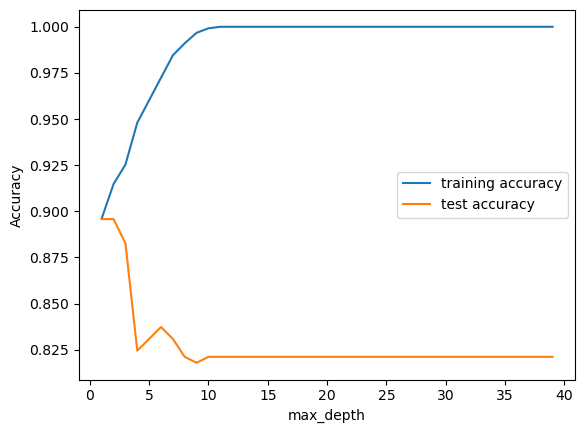

In [176]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Tuning min_samples_leaf**

In [177]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [178]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001994,0.000631,0.001197,0.000399,5,{'min_samples_leaf': 5},0.854839,0.870968,0.838710,0.852459,...,0.850608,0.012561,5,0.939024,0.955285,0.943089,0.947368,0.939271,0.944808,0.006056
1,0.003208,0.001603,0.001189,0.000401,25,{'min_samples_leaf': 25},0.887097,0.967742,0.935484,0.868852,...,0.895769,0.051668,1,0.898374,0.878049,0.886179,0.902834,0.914980,0.896083,0.012894
2,0.001891,0.000173,0.000799,0.000400,45,{'min_samples_leaf': 45},0.887097,0.967742,0.935484,0.868852,...,0.895769,0.051668,1,0.898374,0.878049,0.886179,0.902834,0.914980,0.896083,0.012894
3,0.001205,0.000754,0.000591,0.000483,65,{'min_samples_leaf': 65},0.887097,0.967742,0.935484,0.868852,...,0.895769,0.051668,1,0.898374,0.878049,0.886179,0.902834,0.914980,0.896083,0.012894
4,0.003136,0.006271,0.000000,0.000000,85,{'min_samples_leaf': 85},0.887097,0.967742,0.935484,0.868852,...,0.895769,0.051668,1,0.898374,0.878049,0.886179,0.902834,0.914980,0.896083,0.012894


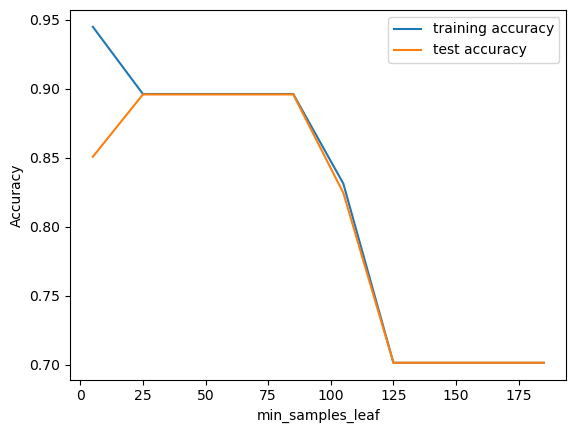

In [179]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


**Tuning min_samples_split**

In [183]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [184]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002794,0.000399,0.001396,0.000488,5,{'min_samples_split': 5},0.822581,0.951613,0.822581,0.770492,...,0.824273,0.069337,10,0.987805,0.987805,0.987805,0.979757,0.987854,0.986205,0.003224
1,0.001989,0.000617,0.001247,0.000478,25,{'min_samples_split': 25},0.838710,0.951613,0.887097,0.803279,...,0.853517,0.059889,9,0.955285,0.922764,0.943089,0.935223,0.955466,0.942365,0.012444
2,0.001395,0.000488,0.000999,0.000002,45,{'min_samples_split': 45},0.903226,0.967742,0.887097,0.868852,...,0.886039,0.053135,8,0.922764,0.894309,0.939024,0.902834,0.947368,0.921260,0.020324
3,0.001415,0.000813,0.000598,0.000489,65,{'min_samples_split': 65},0.903226,0.967742,0.919355,0.868852,...,0.892491,0.054804,7,0.922764,0.894309,0.918699,0.902834,0.947368,0.917195,0.018296
4,0.000000,0.000000,0.003131,0.006262,85,{'min_samples_split': 85},0.903226,0.967742,0.919355,0.868852,...,0.895769,0.049613,1,0.922764,0.894309,0.918699,0.902834,0.935223,0.914766,0.014552


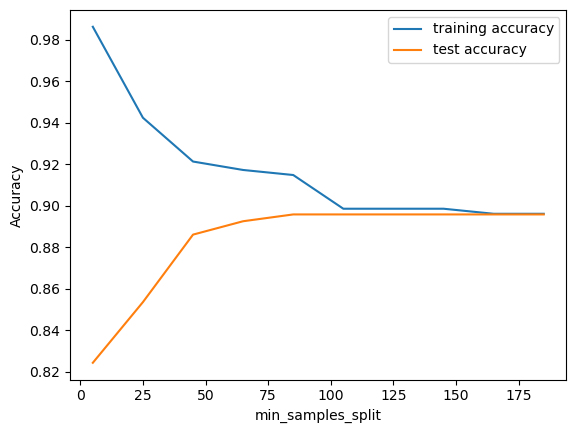

In [185]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Grid Search to Find Optimal Hyperparameters**

In [187]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(2, 5),
    'min_samples_leaf': range(25, 100, 25),
    'min_samples_split': range(100, 175, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1,return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(2, 5),
                         'min_samples_leaf': range(25, 100, 25),
                         'min_samples_split': range(100, 175, 50)},
             return_train_score=True, verbose=1)

In [188]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002603,0.000496,0.001189,0.000382,entropy,2,25,100,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.887097,...,0.895769,0.051668,1,0.898374,0.878049,0.886179,0.902834,0.91498,0.896083,0.012894
1,0.001389,0.000493,0.001203,0.000396,entropy,2,25,150,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.887097,...,0.895769,0.051668,1,0.898374,0.878049,0.886179,0.902834,0.91498,0.896083,0.012894
2,0.000899,0.000490,0.000598,0.000488,entropy,2,50,100,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.887097,...,0.895769,0.051668,1,0.898374,0.878049,0.886179,0.902834,0.91498,0.896083,0.012894
3,0.000000,0.000000,0.003108,0.006216,entropy,2,50,150,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.887097,...,0.895769,0.051668,1,0.898374,0.878049,0.886179,0.902834,0.91498,0.896083,0.012894
4,0.003131,0.006263,0.000000,0.000000,entropy,2,75,100,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.887097,...,0.895769,0.051668,1,0.898374,0.878049,0.886179,0.902834,0.91498,0.896083,0.012894
5,0.003124,0.006249,0.000000,0.000000,entropy,2,75,150,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.887097,...,0.895769,0.051668,1,0.898374,0.878049,0.886179,0.902834,0.91498,0.896083,0.012894
6,0.000000,0.000000,0.000000,0.000000,entropy,3,25,100,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.887097,...,0.895769,0.051668,1,0.898374,0.878049,0.886179,0.902834,0.91498,0.896083,0.012894
7,0.003131,0.006263,0.000000,0.000000,entropy,3,25,150,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.887097,...,0.895769,0.051668,1,0.898374,0.878049,0.886179,0.902834,0.91498,0.896083,0.012894
8,0.003124,0.006249,0.000000,0.000000,entropy,3,50,100,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.887097,...,0.895769,0.051668,1,0.898374,0.878049,0.886179,0.902834,0.91498,0.896083,0.012894
9,0.001202,0.002404,0.000000,0.000000,entropy,3,50,150,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.887097,...,0.895769,0.051668,1,0.898374,0.878049,0.886179,0.902834,0.91498,0.896083,0.012894


In [189]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8957694341618192
DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=25,
                       min_samples_split=100)


**Running the model with best parameters obtained from grid search.**

In [190]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=4, 
                                  min_samples_leaf=75,
                                  min_samples_split=150)
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=75, min_samples_split=150,
                       random_state=100)

In [192]:
# accuracy score
clf_gini.score(X_test,Y_test)

0.9545454545454546

In [197]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        82
           1       0.91      0.98      0.94        50

    accuracy                           0.95       132
   macro avg       0.95      0.96      0.95       132
weighted avg       0.96      0.95      0.95       132



In [199]:
print(confusion_matrix(Y_test,y_pred))

[[77  5]
 [ 1 49]]


# Random Forest

In [201]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [202]:
# fit
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [204]:
predictions = rfc.predict(X_test)

In [205]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        82
           1       0.92      0.96      0.94        50

    accuracy                           0.95       132
   macro avg       0.95      0.96      0.95       132
weighted avg       0.96      0.95      0.95       132



In [207]:
print(confusion_matrix(Y_test,predictions))

[[78  4]
 [ 2 48]]


In [208]:
print(accuracy_score(Y_test,predictions))

0.9545454545454546


# Hyperparameter Tuning

Tuning n_estimators

In [211]:

n_folds = 5


parameters = {'n_estimators': range(100, 1000, 150)}
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, n_jobs = -1, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4), n_jobs=-1,
             param_grid={'n_estimators': range(100, 1000, 150)},
             return_train_score=True, scoring='accuracy')

In [212]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.449587,0.007904,0.033289,0.005865,100,{'n_estimators': 100},0.870968,0.983871,0.935484,0.852459,...,0.892491,0.059274,6,0.951220,0.926829,0.934959,0.947368,0.971660,0.946407,0.015337
1,1.042115,0.029338,0.085188,0.005399,250,{'n_estimators': 250},0.870968,1.000000,0.919355,0.868852,...,0.895769,0.060911,3,0.943089,0.934959,0.939024,0.943320,0.971660,0.946411,0.012991
2,1.699735,0.031006,0.130306,0.005710,400,{'n_estimators': 400},0.870968,1.000000,0.919355,0.885246,...,0.899048,0.059805,2,0.943089,0.930894,0.939024,0.943320,0.967611,0.944788,0.012265
3,2.343635,0.042140,0.178358,0.012703,550,{'n_estimators': 550},0.870968,0.983871,0.919355,0.868852,...,0.892544,0.055492,5,0.943089,0.930894,0.939024,0.947368,0.971660,0.946407,0.013746
4,2.938815,0.063797,0.220745,0.015195,700,{'n_estimators': 700},0.870968,0.983871,0.935484,0.868852,...,0.895769,0.057393,3,0.943089,0.930894,0.939024,0.943320,0.971660,0.945598,0.013785


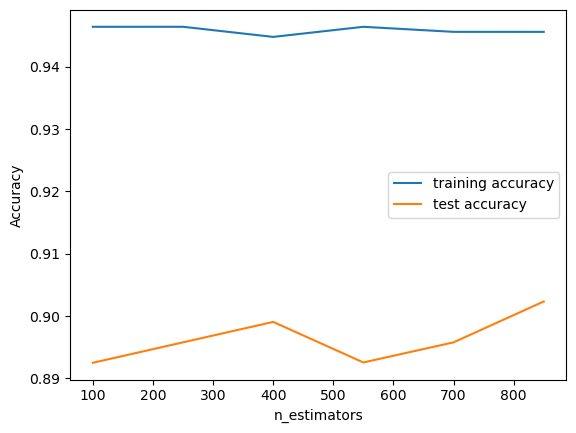

In [213]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Max Features

In [224]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [2,3,4]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4, n_estimators=700)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, n_jobs = -1, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, n_estimators=700),
             n_jobs=-1, param_grid={'max_features': [2, 3, 4]},
             return_train_score=True, scoring='accuracy')

In [225]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.882902,0.115433,0.229295,0.013761,2,{'max_features': 2},0.870968,1.0,0.919355,0.885246,...,0.899048,0.059805,3,0.943089,0.930894,0.943089,0.947368,0.971660,0.947220,0.013401
1,2.853883,0.132138,0.224278,0.014361,3,{'max_features': 3},0.870968,1.0,0.951613,0.885246,...,0.905500,0.063286,1,0.951220,0.934959,0.943089,0.947368,0.967611,0.948850,0.010825
2,2.811036,0.036914,0.187199,0.010054,4,{'max_features': 4},0.887097,1.0,0.935484,0.885246,...,0.902221,0.064767,2,0.951220,0.943089,0.943089,0.951417,0.967611,0.951285,0.008954


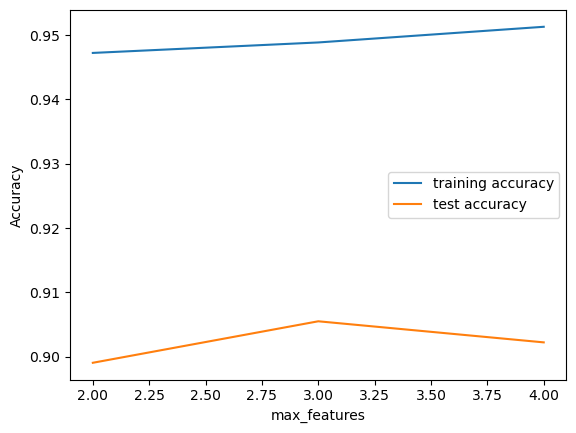

In [226]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# Grid Search to Find Optimal Hyperparameters

In [227]:
param_grid = {
    'max_depth': [1,2,3],
    'min_samples_leaf': range(25, 100, 25),
    'min_samples_split': range(100, 175, 50),
    'n_estimators': [100,1000, 100], 
    'max_features': [2, 4, 1]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, return_train_score=True)

In [228]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3], 'max_features': [2, 4, 1],
                         'min_samples_leaf': range(25, 100, 25),
                         'min_samples_split': range(100, 175, 50),
                         'n_estimators': [100, 1000, 100]},
             return_train_score=True, verbose=1)

In [229]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8991687289802653 using {'max_depth': 1, 'max_features': 2, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 100}


Fitting the final model with the best parameters obtained from grid search.

In [231]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=1,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=2,
                             n_estimators=100)

In [232]:
# fit
rfc.fit(X_train,Y_train)

RandomForestClassifier(max_depth=1, max_features=2, min_samples_leaf=50,
                       min_samples_split=100)

In [233]:
# predict
predictions = rfc.predict(X_test)

In [235]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96        82
           1       0.94      0.92      0.93        50

    accuracy                           0.95       132
   macro avg       0.95      0.94      0.94       132
weighted avg       0.95      0.95      0.95       132



In [236]:
print(confusion_matrix(Y_test,predictions))

[[79  3]
 [ 4 46]]


# AdaBoost

In [239]:

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
from sklearn import metrics

In [252]:
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
adaboost_model_1 = AdaBoostClassifier(
    base_estimator=tree,
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

In [253]:
# fit
adaboost_model_1.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1.5, n_estimators=600)

In [254]:
# predictions
# the second column represents the probability of a click resulting in a download
predictions = adaboost_model_1.predict_proba(X_test)
predictions[:10]

array([[0.48494296, 0.51505704],
       [0.55589501, 0.44410499],
       [0.4503251 , 0.5496749 ],
       [0.55060225, 0.44939775],
       [0.48807414, 0.51192586],
       [0.56532951, 0.43467049],
       [0.49780961, 0.50219039],
       [0.52372581, 0.47627419],
       [0.54185768, 0.45814232],
       [0.48036909, 0.51963091]])

In [256]:
# metrics: AUC
metrics.roc_auc_score(Y_test, predictions[:,1])

0.9617073170731707

# AdaBoost - Hyperparameter Tuning

In [278]:
# parameter grid
param_grid = {"base_estimator__max_depth" : [1,2,3],
              "n_estimators": [200, 400, 600]
             }

In [279]:
# base estimator
tree = DecisionTreeClassifier()

# adaboost with the tree as base estimator
# learning rate is arbitrarily set to 0.6, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    algorithm="SAMME")

In [280]:
# run grid search
folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)


In [281]:
# fit 
grid_search_ABC.fit(X_train, Y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(),
                                          learning_rate=0.6),
             param_grid={'base_estimator__max_depth': [1, 2, 3],
                         'n_estimators': [200, 400, 600]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [282]:
# cv results
cv_results = pd.DataFrame(grid_search_ABC.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.177465,0.007650,0.010426,0.007372,1,200,"{'base_estimator__max_depth': 1, 'n_estimators...",0.970206,0.963486,0.889120,0.940937,0.036743,1,0.995332,0.992771,0.999664,0.995922,0.002845
1,0.350508,0.007003,0.022376,0.009551,1,400,"{'base_estimator__max_depth': 1, 'n_estimators...",0.966398,0.956541,0.889815,0.937585,0.034017,2,0.999431,0.999260,1.000000,0.999564,0.000316
2,0.588133,0.059071,0.034371,0.006396,1,600,"{'base_estimator__max_depth': 1, 'n_estimators...",0.965502,0.952061,0.891204,0.936255,0.032326,3,1.000000,0.999886,1.000000,0.999962,0.000054
3,0.187948,0.000398,0.015581,0.000416,2,200,"{'base_estimator__max_depth': 2, 'n_estimators...",0.972222,0.950269,0.863889,0.928793,0.046761,7,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.390110,0.006782,0.028215,0.009296,2,400,"{'base_estimator__max_depth': 2, 'n_estimators...",0.971774,0.948029,0.861574,0.927126,0.047355,8,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.568775,0.001610,0.035456,0.005937,2,600,"{'base_estimator__max_depth': 2, 'n_estimators...",0.968190,0.950717,0.854167,0.924358,0.050143,9,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.207783,0.004722,0.012262,0.004751,3,200,"{'base_estimator__max_depth': 3, 'n_estimators...",0.973566,0.952509,0.863426,0.929834,0.047738,6,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.428347,0.015475,0.031207,0.000053,3,400,"{'base_estimator__max_depth': 3, 'n_estimators...",0.974462,0.957437,0.863889,0.931930,0.048611,4,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.615591,0.010094,0.036475,0.007371,3,600,"{'base_estimator__max_depth': 3, 'n_estimators...",0.973566,0.956541,0.862037,0.930715,0.049057,5,1.000000,1.000000,1.000000,1.000000,0.000000


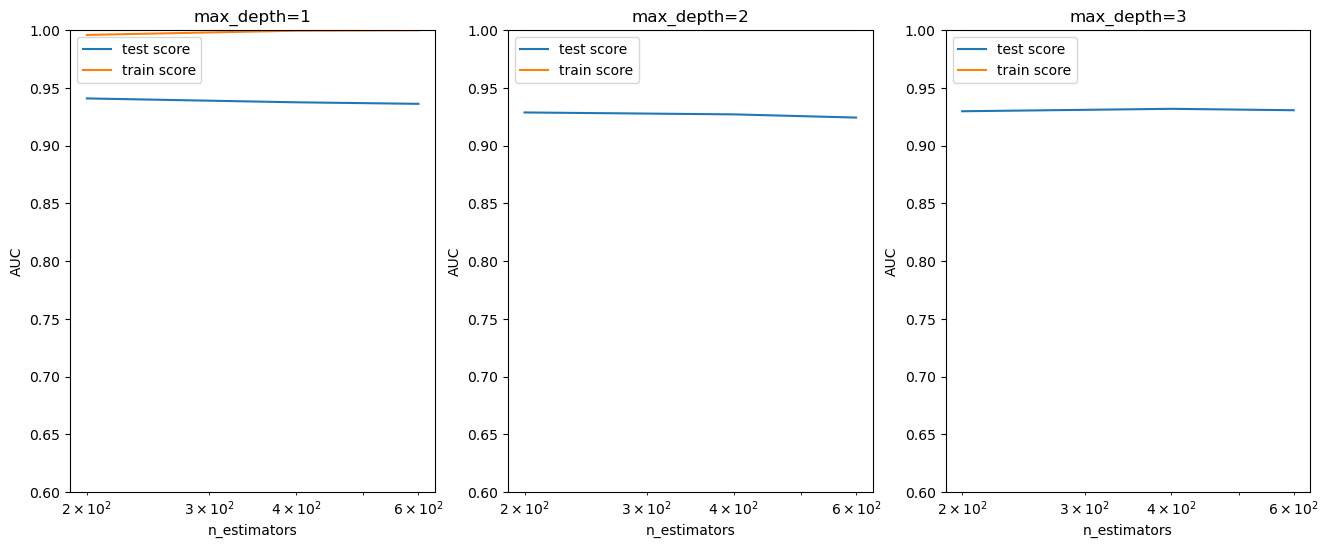

In [283]:
# plotting AUC with hyperparameter combinations

plt.figure(figsize=(16,6))
for n, depth in enumerate(param_grid['base_estimator__max_depth']):
    

    # subplot 1/n
    plt.subplot(1,3, n+1)
    depth_df = cv_results[cv_results['param_base_estimator__max_depth']==depth]

    plt.plot(depth_df["param_n_estimators"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_n_estimators"], depth_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')


In [294]:
# model performance on test data with chosen hyperparameters

# base estimator
tree = DecisionTreeClassifier(max_depth=1)

# adaboost with the tree as base estimator
# learning rate is arbitrarily set, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    n_estimators=200,
    algorithm="SAMME")

ABC.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.6, n_estimators=200)

In [295]:
# predict on test data
predictions = ABC.predict_proba(X_test)
predictions[:10]

array([[0.47227791, 0.52772209],
       [0.64479833, 0.35520167],
       [0.41149147, 0.58850853],
       [0.6425338 , 0.3574662 ],
       [0.45717902, 0.54282098],
       [0.65582   , 0.34418   ],
       [0.47227791, 0.52772209],
       [0.572476  , 0.427524  ],
       [0.63099123, 0.36900877],
       [0.49963799, 0.50036201]])

In [296]:
# roc auc
metrics.roc_auc_score(Y_test, predictions[:, 1])

0.9658536585365854

# Gradient Boosting Classifier

In [288]:
# parameter grid
param_grid = {"learning_rate": [0.2, 0.6, 0.9],
              "subsample": [0.3, 0.6, 0.9]
             }

In [297]:
GBC = GradientBoostingClassifier(max_depth=1, n_estimators=200)

In [298]:
folds = 3
grid_search_GBC = GridSearchCV(GBC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)

grid_search_GBC.fit(X_train, Y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=1,
                                                  n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6, 0.9],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [303]:
cv_results = pd.DataFrame(grid_search_GBC.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.065522,0.011261,0.002123,0.001788,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.949373,0.939068,0.845602,0.911348,0.046679,6,0.996585,0.995902,0.999104,0.997197,0.001377
1,0.068744,0.007006,0.000000,0.000000,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.963262,0.949373,0.855093,0.922576,0.048053,2,0.997723,0.997951,0.999888,0.998521,0.000971
2,0.067887,0.007558,0.005757,0.008141,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.966846,0.954749,0.872685,0.931427,0.041829,1,0.998292,0.998065,0.999888,0.998748,0.000811
3,0.062803,0.000225,0.000000,0.000000,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.382616,0.247312,0.746991,0.458973,0.211017,9,0.581967,0.274875,0.956317,0.604386,0.278649
4,0.061468,0.001798,0.001347,0.001906,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.962814,0.934588,0.851852,0.916418,0.047087,5,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.076988,0.009056,0.001831,0.000207,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.961470,0.929659,0.872222,0.921117,0.036932,3,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.064506,0.002902,0.002637,0.000454,0.9,0.3,"{'learning_rate': 0.9, 'subsample': 0.3}",0.874552,0.637321,0.795602,0.769158,0.098638,8,0.873634,0.667350,0.705253,0.748746,0.089655
7,0.072841,0.002092,0.001995,0.000002,0.9,0.6,"{'learning_rate': 0.9, 'subsample': 0.6}",0.935484,0.944444,0.807870,0.895933,0.062377,7,0.986453,1.000000,0.932292,0.972915,0.029252
8,0.067628,0.008520,0.005219,0.007381,0.9,0.9,"{'learning_rate': 0.9, 'subsample': 0.9}",0.961470,0.925179,0.864815,0.917155,0.039865,4,1.000000,1.000000,1.000000,1.000000,0.000000


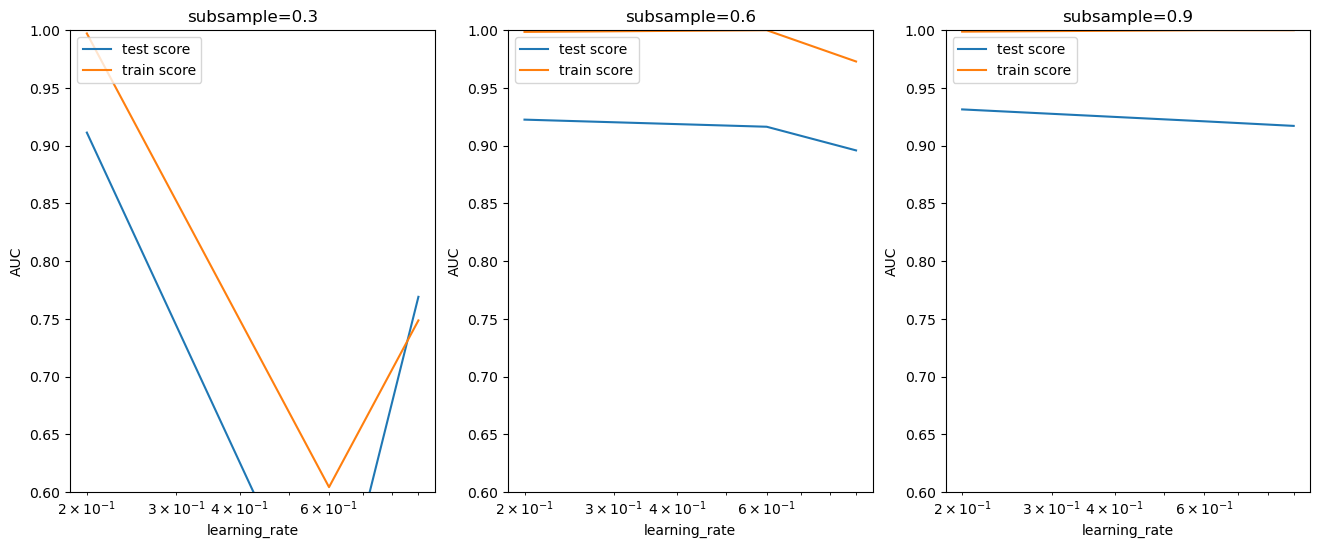

In [300]:
# # plotting
plt.figure(figsize=(16,6))


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [304]:
# parameter grid
param_grid = {"learning_rate": [0.2],
              "subsample": [0.9]
             }

In [305]:
folds = 3
grid_search_GBC = GridSearchCV(GBC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)

grid_search_GBC.fit(X_train, Y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=1,
                                                  n_estimators=200),
             param_grid={'learning_rate': [0.2], 'subsample': [0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [306]:
# predict on test data
predictions = grid_search_GBC.predict_proba(X_test)
predictions[:10]

array([[6.28921436e-02, 9.37107856e-01],
       [9.97562301e-01, 2.43769940e-03],
       [1.03340992e-02, 9.89665901e-01],
       [9.95337915e-01, 4.66208510e-03],
       [1.86560363e-01, 8.13439637e-01],
       [9.99442240e-01, 5.57760114e-04],
       [1.28266522e-01, 8.71733478e-01],
       [9.14747265e-01, 8.52527353e-02],
       [9.87004009e-01, 1.29959915e-02],
       [5.63951147e-01, 4.36048853e-01]])

In [308]:
# roc auc
metrics.roc_auc_score(Y_test, predictions[:, 1])

0.9719512195121951

# XGBoost

In [328]:
import sklearn
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc

In [329]:
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [330]:
Y_pred = model.predict_proba(X_test)
Y_pred[:10]

array([[2.3278832e-02, 9.7672117e-01],
       [9.9919033e-01, 8.0966065e-04],
       [6.8547726e-03, 9.9314523e-01],
       [9.9676859e-01, 3.2314186e-03],
       [4.5915818e-01, 5.4084182e-01],
       [9.9952072e-01, 4.7930982e-04],
       [3.5015106e-02, 9.6498489e-01],
       [9.9742967e-01, 2.5703569e-03],
       [9.9842000e-01, 1.5799814e-03],
       [3.7337965e-01, 6.2662035e-01]], dtype=float32)

In [331]:
# evaluate predictions
roc = metrics.roc_auc_score(Y_test, Y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 96.95%


In [332]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      


In [333]:
# fit the model
model_cv.fit(X_train, Y_train) 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, 

In [334]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.083302,0.011017,0.006979,0.000818,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.945789,0.942204,0.874306,0.920766,0.032885,5,0.995105,0.995674,0.996416,0.995731,0.000537
1,0.086894,0.002739,0.006317,0.000469,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.967742,0.959677,0.864352,0.930590,0.046953,2,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.087007,0.002906,0.004322,0.003083,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.975806,0.963710,0.861111,0.933542,0.051454,1,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.084317,0.006979,0.010047,0.003950,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.911290,0.917115,0.845602,0.891336,0.032426,6,0.995276,0.998520,0.998208,0.997334,0.001461
4,0.077515,0.007557,0.014585,0.001470,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.951165,0.940860,0.871991,0.921339,0.035147,4,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.087067,0.000568,0.006488,0.000409,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.969086,0.957437,0.851389,0.925971,0.052951,3,1.000000,1.000000,1.000000,1.000000,0.000000


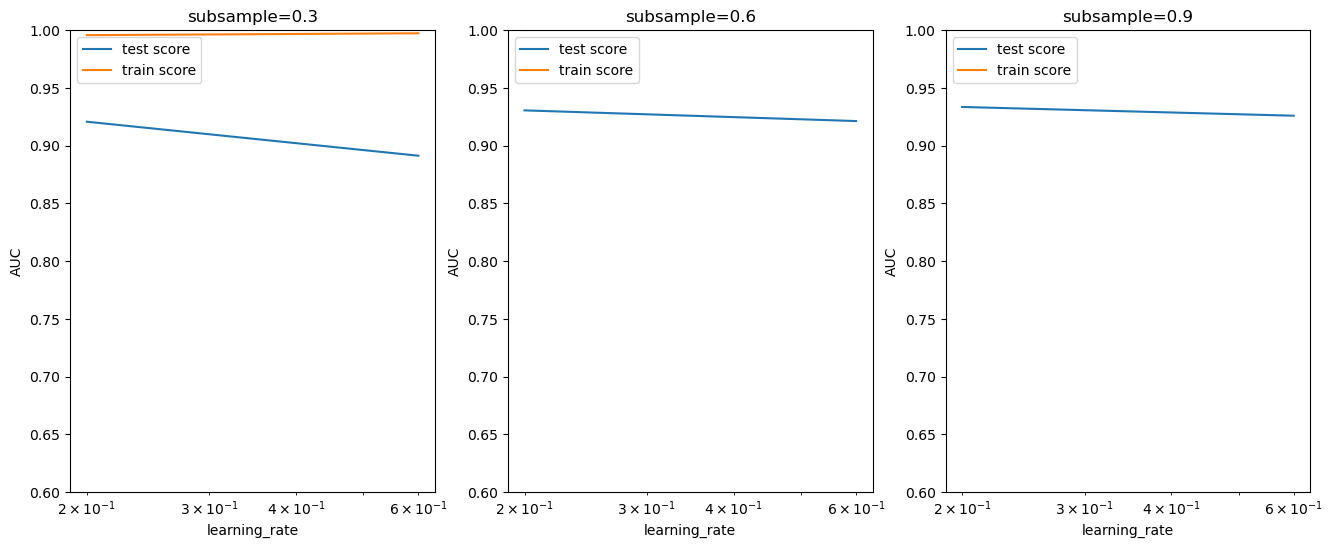

In [336]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [337]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train, Y_train)

[00:37:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "params" } are not used.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', ...)

In [338]:
# predict
Y_pred = model.predict_proba(X_test)
Y_pred[:10]

array([[2.3278832e-02, 9.7672117e-01],
       [9.9919033e-01, 8.0966065e-04],
       [6.8547726e-03, 9.9314523e-01],
       [9.9676859e-01, 3.2314186e-03],
       [4.5915818e-01, 5.4084182e-01],
       [9.9952072e-01, 4.7930982e-04],
       [3.5015106e-02, 9.6498489e-01],
       [9.9742967e-01, 2.5703569e-03],
       [9.9842000e-01, 1.5799814e-03],
       [3.7337965e-01, 6.2662035e-01]], dtype=float32)

In [339]:
# roc_auc
auc = sklearn.metrics.roc_auc_score(Y_test, Y_pred[:, 1])
auc

0.9695121951219512

In [340]:
# feature importance
importance = dict(zip(X_train.columns, model.feature_importances_))
importance

{'Region': 0.044756968,
 'Fresh': 0.06755419,
 'Milk': 0.100496955,
 'Grocery': 0.08077009,
 'Frozen': 0.04146914,
 'Detergents_Paper': 0.6064276,
 'Delicassen': 0.058525003}

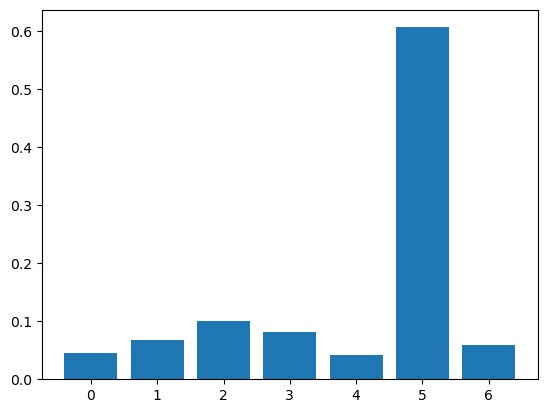

In [341]:
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()